 # Allen Brain Atlas Developing Human Brain Sample (microarray)

 Author: Moshe Silverstein <br/>
 Date: 3-18 <br/>
 Data Source: http://www.brainspan.org/static/download.html

 Reviewer: Charles Dai <br>
 Updated: 6-20

In [62]:
# appyter init
from appyter import magic
magic.init(lambda _=globals: _())

In [63]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import harmonizome.utility_functions as uf
import harmonizome.lookup as lookup

In [64]:
# from clustergrammer_widget import *
# net = Network(clustergrammer_widget)

In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 ### Python Version

In [66]:
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

 # Initialization

 ### Load Mapping Dictionaries

In [67]:
symbol_lookup, geneid_lookup = lookup.get_lookups()

Gathering sources: 100%|██████████| 3/3 [00:08<00:00,  2.68s/it]


 ### Output Path

In [68]:
output_name = 'achilles'

path = 'Output/Achilles'
if not os.path.exists(path):
    os.makedirs(path)

In [69]:
%%appyter hide_code
{% do SectionField(
    name='data',
    title='Load Data',
    subtitle='Upload Files from the Achilles RNAi Data Set. Link: http://portals.broadinstitute.org/achilles/',
) %}

 # Load Data

In [70]:
%%appyter code_exec

matrix = pd.read_csv({{FileField(
    constraint='.*\.gct$',
    name='rnai',
    label='RNAi Screen',
    default='Input/Achilles/Achilles_v2.4.6.rnai.gct',
    section='data')
}}, sep='\t', skiprows=2)

```python

matrix = pd.read_csv('Input/Achilles/Achilles_v2.4.6.rnai.gct', sep='\t', skiprows=2)
```

In [71]:
matrix.head()

,Name,Description,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,...,TT_OESOPHAGUS,TYKNU_OVARY,U178_CENTRAL_NERVOUS_SYSTEM,U251MG_CENTRAL_NERVOUS_SYSTEM,U343_CENTRAL_NERVOUS_SYSTEM,U87MG_CENTRAL_NERVOUS_SYSTEM,UOK101_KIDNEY,VCAP_PROSTATE,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR7530_BREAST
0,AAAAATGGCATCAACCACCAT_RPS6KA1,RPS6KA1,0.745271,-0.041123,-0.242875,-0.720484,1.114986,-0.201683,0.120900,-0.018283,...,0.114314,-0.663695,1.349817,0.372243,0.535807,-0.083225,-0.570613,-1.345746,0.486741,-1.674485
1,AAACACATTTGGGATGTTCCT_IGF1R,IGF1R,1.547808,2.190488,1.813222,1.055123,1.711305,0.895790,1.392671,1.508456,...,1.098053,1.292968,0.660043,1.143449,1.447363,0.797539,-0.448928,-0.148166,-0.062247,0.329107
2,AAAGAAGAAGCTGCAATATCT_TSC1,TSC1,1.802590,1.536374,1.671655,1.749983,2.372121,2.782871,2.166329,1.767422,...,2.062967,1.339992,0.516197,1.865463,2.527933,0.829466,1.786617,0.653663,2.098124,-0.144754
3,AAGCGTGCCGTAGACTGTCCA_CHEK1,CHEK1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.744278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AATCTAAGAGAGCTGCCATCG_XRCC5,XRCC5,-2.809293,-1.330285,-2.912347,-0.937037,-2.063379,-2.417872,-0.845071,-1.736412,...,-2.513774,-2.212275,-2.655619,-2.378872,-1.977371,-1.998843,-2.658554,-0.709515,-1.209283,-2.755154


In [72]:
matrix.shape

(57369, 218)

 # Pre-process Data

  ## Get Relevent Data

In [73]:
matrix = matrix.drop(columns=['Name'])
matrix = matrix.rename(columns={'Description': 'Gene'})
matrix = matrix.set_index('Gene')
matrix.columns = map(lambda col: col.split('_')[0], matrix.columns)
matrix.head()

,22RV1,697,786O,A1207,A172,A204,A2058,A549,A673,ACHN,...,TT,TYKNU,U178,U251MG,U343,U87MG,UOK101,VCAP,YKG1,ZR7530
Gene,,,,,,,,,,,,,,,,,,,,,
RPS6KA1,0.745271,-0.041123,-0.242875,-0.720484,1.114986,-0.201683,0.120900,-0.018283,1.145122,0.715434,...,0.114314,-0.663695,1.349817,0.372243,0.535807,-0.083225,-0.570613,-1.345746,0.486741,-1.674485
IGF1R,1.547808,2.190488,1.813222,1.055123,1.711305,0.895790,1.392671,1.508456,1.037740,1.466118,...,1.098053,1.292968,0.660043,1.143449,1.447363,0.797539,-0.448928,-0.148166,-0.062247,0.329107
TSC1,1.802590,1.536374,1.671655,1.749983,2.372121,2.782871,2.166329,1.767422,2.254810,2.281369,...,2.062967,1.339992,0.516197,1.865463,2.527933,0.829466,1.786617,0.653663,2.098124,-0.144754
CHEK1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.744278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRCC5,-2.809293,-1.330285,-2.912347,-0.937037,-2.063379,-2.417872,-0.845071,-1.736412,-2.719721,-1.830852,...,-2.513774,-2.212275,-2.655619,-2.378872,-1.977371,-1.998843,-2.658554,-0.709515,-1.209283,-2.755154


 ## Save Unfiltered Matrix to file

In [74]:
uf.saveData(matrix, path, output_name + '_matrix_unfiltered',
            ext='tsv', compression='gzip')

 # Filter Data

 ## Remove Data that is More Than 95% Missing and Impute Missing Data

In [75]:
matrix = uf.removeAndImpute(matrix)
matrix.head()

,22RV1,697,786O,A1207,A172,A204,A2058,A549,A673,ACHN,...,TT,TYKNU,U178,U251MG,U343,U87MG,UOK101,VCAP,YKG1,ZR7530
Gene,,,,,,,,,,,,,,,,,,,,,
RPS6KA1,0.745271,-0.041123,-0.242875,-0.720484,1.114986,-0.201683,0.120900,-0.018283,1.145122,0.715434,...,0.114314,-0.663695,1.349817,0.372243,0.535807,-0.083225,-0.570613,-1.345746,0.486741,-1.674485
IGF1R,1.547808,2.190488,1.813222,1.055123,1.711305,0.895790,1.392671,1.508456,1.037740,1.466118,...,1.098053,1.292968,0.660043,1.143449,1.447363,0.797539,-0.448928,-0.148166,-0.062247,0.329107
TSC1,1.802590,1.536374,1.671655,1.749983,2.372121,2.782871,2.166329,1.767422,2.254810,2.281369,...,2.062967,1.339992,0.516197,1.865463,2.527933,0.829466,1.786617,0.653663,2.098124,-0.144754
CHEK1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.744278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRCC5,-2.809293,-1.330285,-2.912347,-0.937037,-2.063379,-2.417872,-0.845071,-1.736412,-2.719721,-1.830852,...,-2.513774,-2.212275,-2.655619,-2.378872,-1.977371,-1.998843,-2.658554,-0.709515,-1.209283,-2.755154


In [76]:
matrix.shape

(57369, 216)

 ## Map Gene Symbols to Up-to-date Approved Gene Symbols

In [77]:
matrix = uf.mapgenesymbols(matrix, symbol_lookup)
matrix.shape

100%|██████████| 57369/57369 [00:00<00:00, 504066.13it/s]


(54517, 216)

 ## Merge Duplicate Genes By Rows and Duplicate Columns

In [78]:
matrix = uf.merge(matrix, 'row', 'mean')
matrix = uf.merge(matrix, 'column', 'mean')
matrix.shape

(12027, 216)

 ## Log2 Transform

In [79]:
# Input is already log-fold change
# matrix = uf.log2(matrix)
# matrix.head()

 ## Normalize Matrix (Quantile Normalize the Matrix by Column)

In [80]:
matrix = uf.quantileNormalize(matrix)
matrix.head()

,22RV1,697,786O,A1207,A172,A204,A2058,A549,A673,ACHN,...,TT,TYKNU,U178,U251MG,U343,U87MG,UOK101,VCAP,YKG1,ZR7530
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.276941,-1.091000,-1.943347,-1.789369,-1.414627,-1.051492,-1.751080,-1.379273,-0.834106,-1.466215,...,-1.411745,-0.795706,-1.025245,-1.754456,-0.846290,-1.681879,-1.053394,-1.154830,-1.935949,-1.723702
A1CF,-0.666266,-0.097342,-0.545806,0.170120,-0.430512,-0.386157,-1.082090,-0.813922,-1.021730,-0.681530,...,-0.690216,-0.044073,-0.806823,-0.239935,0.167042,-0.300814,-0.774190,-0.609776,0.324868,-0.546088
A2M,-1.161218,-0.923217,-0.754888,-1.303896,-0.649750,-0.409408,-1.101223,-0.826974,-0.633179,-0.458545,...,-0.405303,-1.279767,-1.204735,-0.626921,-0.926602,-2.071358,-1.196559,-0.420962,-0.551245,0.267876
A2ML1,-0.918575,-0.960548,-1.306107,-0.674400,-1.111936,-0.298000,-1.042274,-0.629721,-1.128090,-1.272049,...,-1.307661,-0.402241,-1.321253,-1.233761,-0.734025,-1.437165,-1.020094,-0.347736,-1.510908,-0.768116
A4GALT,-0.619727,-1.357891,-0.663269,-0.162421,-0.434110,-1.037058,-0.410335,-0.903383,-0.799760,-0.800094,...,-0.684979,-1.150547,-1.214035,-0.601171,-0.436003,-0.418642,-0.497357,-0.477093,-0.972359,-0.778539


 ## Normalize Matrix (Z-Score the Rows)

In [81]:
matrix = uf.zscore(matrix, 'row')
matrix.head()

,22RV1,697,786O,A1207,A172,A204,A2058,A549,A673,ACHN,...,TT,TYKNU,U178,U251MG,U343,U87MG,UOK101,VCAP,YKG1,ZR7530
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.292296,0.710949,-1.208144,-0.861455,-0.017709,0.799903,-0.775247,0.061890,1.289356,-0.133863,...,-0.011221,1.375814,0.858998,-0.782849,1.261924,-0.619437,0.795620,0.567233,-1.191487,-0.713603
A1CF,-0.597831,0.642558,-0.335200,1.225687,-0.083831,0.012872,-1.504426,-0.919755,-1.372826,-0.631109,...,-0.650048,0.758695,-0.904279,0.331672,1.218976,0.198941,-0.833130,-0.474669,1.563075,-0.335814
A2M,-0.438795,0.137540,0.545160,-0.784298,0.799759,1.381763,-0.293513,0.370599,0.839886,1.262776,...,1.391704,-0.725868,-0.544175,0.855041,0.129344,-2.642759,-0.524375,1.353785,1.038295,3.021851
A2ML1,0.529993,0.413469,-0.545852,1.207856,-0.006807,2.252797,0.186584,1.331892,-0.051652,-0.451301,...,-0.550167,1.963409,-0.587900,-0.345011,1.042329,-0.909687,0.248161,2.114722,-1.114409,0.947688
A4GALT,0.364380,-1.372492,0.261926,1.440402,0.801129,-0.617585,0.857069,-0.303053,-0.059230,-0.060017,...,0.210845,-0.884619,-1.034003,0.408041,0.796673,0.837524,0.652310,0.699991,-0.465349,-0.009298


 ## Histogram of First Sample

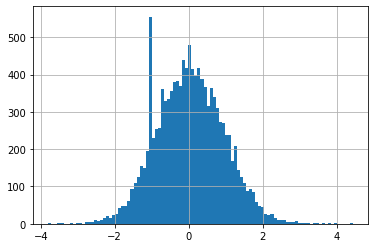

In [82]:
matrix.iloc[:, 0].hist(bins=100)

 ## Histogram of First Gene

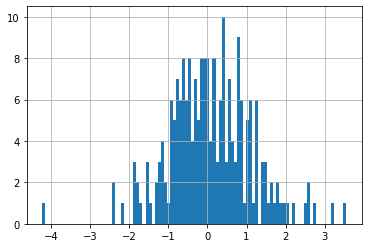

In [83]:
matrix.iloc[0, :].hist(bins=100)

 ## Save Filtered Matrix

In [84]:
uf.saveData(matrix, path, output_name + '_matrix_filtered', 
            ext='tsv', compression='gzip')

 # Analyze Data

 ## Create Gene List

In [85]:
gene_list = uf.createGeneList(matrix, geneid_lookup)
gene_list.head()

100%|██████████| 12027/12027 [00:00<00:00, 289533.80it/s]


,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A4GALT,53947


In [86]:
gene_list.shape

(12027, 2)

In [87]:
uf.saveData(gene_list, path, output_name + '_gene_list',
            ext='tsv', compression='gzip', index=False)

 ## Create Attribute List

In [88]:
attribute_list = uf.createAttributeList(matrix)
attribute_list.head()

""
Attributes
22RV1
697
786O
A1207
A172


In [89]:
attribute_list.shape

(216, 0)

In [90]:
uf.saveData(attribute_list, path, output_name + '_attribute_list',
            ext='tsv', compression='gzip')

 ## Create matrix of Standardized values (values between -1, and 1)

In [91]:
standard_matrix = uf.createStandardizedMatrix(matrix)
standard_matrix.head()

100%|██████████| 12027/12027 [00:01<00:00, 10034.38it/s]


Attributes,22RV1,697,786O,A1207,A172,A204,A2058,A549,A673,ACHN,...,TT,TYKNU,U178,U251MG,U343,U87MG,UOK101,VCAP,YKG1,ZR7530
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.179623,0.465719,-0.833259,-0.686486,-0.021200,0.539538,-0.631114,0.050311,0.779463,-0.159497,...,-0.011749,0.797898,0.585635,-0.640093,0.751766,-0.519359,0.530290,0.391862,-0.823801,-0.593962
A1CF,-0.429494,0.491736,-0.244421,0.842412,-0.059648,0.020709,-0.910029,-0.688127,-0.890293,-0.447417,...,-0.466439,0.584028,-0.659620,0.297969,0.833190,0.233328,-0.604555,-0.364663,0.897742,-0.253399
A2M,-0.292337,0.139049,0.462061,-0.561740,0.526648,0.766557,-0.181603,0.314402,0.554354,0.729669,...,0.775830,-0.532745,-0.375619,0.582033,0.129813,-0.965760,-0.356923,0.757364,0.646656,0.969603
A2ML1,0.354971,0.243919,-0.464768,0.733295,-0.030183,0.964016,0.105516,0.779463,-0.067729,-0.334796,...,-0.473752,0.917874,-0.510391,-0.251764,0.668662,-0.713351,0.170334,0.936309,-0.761107,0.622328
A4GALT,0.296812,-0.836045,0.204220,0.859655,0.527486,-0.522167,0.610562,-0.282531,-0.060801,-0.070521,...,0.167572,-0.669739,-0.707194,0.305767,0.518265,0.573630,0.426002,0.444439,-0.411479,-0.024011


In [92]:
uf.saveData(standard_matrix, path, output_name + '_standard_matrix',
            ext='tsv', compression='gzip')

 ## Plot of A Single Celltype, Normalized Value vs. Standardized Value

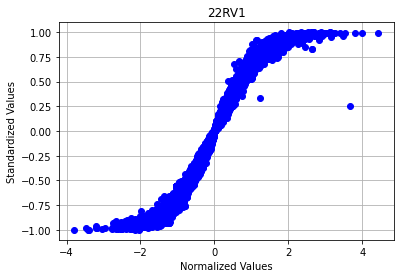

In [93]:
plt.plot(matrix[matrix.columns[0]],
         standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

 ## Create Ternary Matrix

In [94]:
ternary_matrix = uf.createTernaryMatrix(standard_matrix)
ternary_matrix.head()

Attributes,22RV1,697,786O,A1207,A172,A204,A2058,A549,A673,ACHN,...,TT,TYKNU,U178,U251MG,U343,U87MG,UOK101,VCAP,YKG1,ZR7530
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,1
A2ML1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
uf.saveData(ternary_matrix, path, output_name + '_ternary_matrix',
            ext='tsv', compression='gzip')

 ## Create Gene and Attribute Set Libraries

In [96]:
uf.createUpGeneSetLib(ternary_matrix, path, output_name + '_gene_up_set')

100%|██████████| 216/216 [00:00<00:00, 6330.23it/s]


In [97]:
uf.createDownGeneSetLib(ternary_matrix, path, output_name + '_gene_down_set')

100%|██████████| 216/216 [00:00<00:00, 6037.66it/s]


In [98]:
uf.createUpAttributeSetLib(ternary_matrix, path, 
                           output_name + '_attribute_up_set')

100%|██████████| 12027/12027 [00:00<00:00, 40126.04it/s]


In [99]:
uf.createDownAttributeSetLib(ternary_matrix, path, 
                             output_name + '_attribute_down_set')

100%|██████████| 12027/12027 [00:00<00:00, 43411.49it/s]


 ## Create Attribute Similarity Matrix

In [100]:
attribute_similarity_matrix = uf.createSimilarityMatrix(matrix.T, 'cosine')
attribute_similarity_matrix.head()

,22RV1,697,786O,A1207,A172,A204,A2058,A549,A673,ACHN,...,TT,TYKNU,U178,U251MG,U343,U87MG,UOK101,VCAP,YKG1,ZR7530
22RV1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786O,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1207,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A172,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
uf.saveData(attribute_similarity_matrix, path,
            output_name + '_attribute_similarity_matrix', 
            ext='tsv', compression='gzip')

In [102]:
# net.load_df(attribute_similarity_matrix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

 ## Create Gene Similarity Matrix

In [103]:
gene_similarity_matrix = uf.createSimilarityMatrix(matrix, 'cosine')
gene_similarity_matrix.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AACS,AADAC,AADAT,AANAT,...,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM2,ZSWIM9,ZWILCH,ZYG11A,ZYG11B,ZYX,ZZEF1
A1BG,1.000000,-0.178782,-0.071226,0.056985,-0.109804,-0.140424,0.065608,0.011063,0.152985,-0.073207,...,0.098990,-0.020130,-0.080022,0.068850,0.000391,-0.039139,0.015157,0.015157,-0.016943,0.021715
A1CF,-0.178782,1.000000,-0.005279,0.007568,0.033071,0.143592,-0.053993,0.076610,-0.031244,0.000790,...,0.026127,0.074201,-0.115749,0.008231,-0.077671,0.007253,0.007862,0.007862,-0.043525,0.184272
A2M,-0.071226,-0.005279,1.000000,0.018768,-0.179735,-0.116614,-0.018747,0.118856,0.185671,-0.005901,...,0.101721,-0.108418,-0.056594,-0.004826,0.065388,0.020081,-0.006100,-0.006100,0.091349,-0.033655
A2ML1,0.056985,0.007568,0.018768,1.000000,-0.157922,-0.044275,-0.061819,0.172042,0.079025,-0.087346,...,0.085506,-0.052637,0.109528,-0.101176,-0.040900,-0.055369,0.328657,0.328657,0.101786,0.053745
A4GALT,-0.109804,0.033071,-0.179735,-0.157922,1.000000,0.102021,-0.027134,0.043694,-0.206224,0.103329,...,-0.081838,0.140365,-0.149528,-0.082719,0.129320,0.134108,-0.219032,-0.219032,0.126561,-0.131771


In [104]:
uf.saveData(gene_similarity_matrix, path, 
            output_name + '_gene_similarity_matrix',
            compression='npz', symmetric=True, dtype=np.float32)

 ## Create Gene-Attribute Edge List

In [105]:
uf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, 
                               path, output_name + '_gene_attribute_edge_list')

The number of statisticaly relevent gene-attribute associations is: 131173


 # Create Downloadable Save File

In [106]:
uf.createArchive(path)

 ### Link to download output files: [click here](./output_archive.zip)